In [7]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)  #Adjusts configuration of the plots we'll create

#pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\bloop\Desktop\excel portfolio\movies.csv')

In [8]:
#Lets look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [9]:
# Deleting missing data
df = df.dropna()

In [20]:
# Looking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%
YearCorrect - 0.0%


In [21]:
# Data types for columns

df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget           int32
gross            int32
company         object
runtime        float64
YearCorrect     object
dtype: object

In [24]:
#changing data types for cleaning numbers

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)

df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

In [35]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,False,False,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,False,False,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018
7480,False,False,2,2019,1126,6.9,222000.0,1012,1361,457,47,260000000,1670727580,1423,118.0,2019
6653,False,False,0,2015,1303,7.0,593000.0,335,2523,293,47,150000000,1670516444,1397,124.0,2015
6043,False,False,0,2012,1899,8.0,1300000.0,1060,1646,1470,47,220000000,1518815515,983,143.0,2012


In [26]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [30]:
pd.set_option('display.max_rows', None)

In [36]:
#Dropping duplicates

#df.drop_duplicates()

df['company'].drop_duplicates().sort_values(ascending=False)

7129    1474
5664    1473
4007    1472
6793    1471
6420    1470
        ... 
385        4
2929       3
3024       2
7525       1
4345       0
Name: company, Length: 1475, dtype: int16

In [37]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,False,False,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,False,False,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018
7480,False,False,2,2019,1126,6.9,222000.0,1012,1361,457,47,260000000,1670727580,1423,118.0,2019
6653,False,False,0,2015,1303,7.0,593000.0,335,2523,293,47,150000000,1670516444,1397,124.0,2015
6043,False,False,0,2012,1899,8.0,1300000.0,1060,1646,1470,47,220000000,1518815515,983,143.0,2012


In [ ]:
# Budget High correlation 
# Company High correlation 

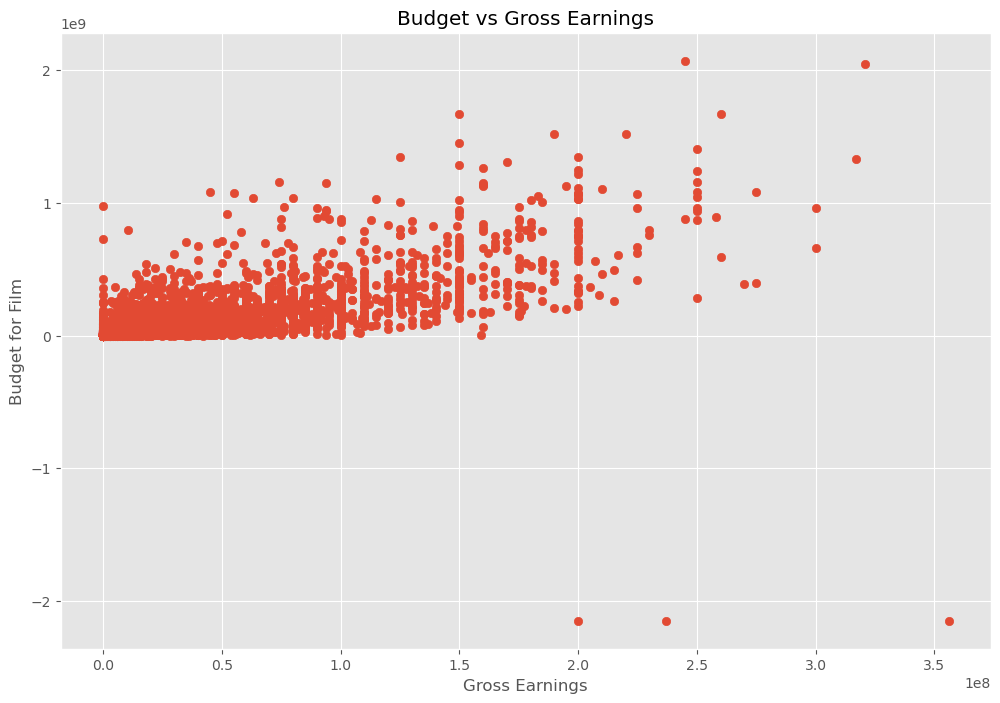

In [45]:
# Scatterplot with buget vs grosss revenue

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

In [44]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,July,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,June,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,May,2012


<Axes: xlabel='budget', ylabel='gross'>

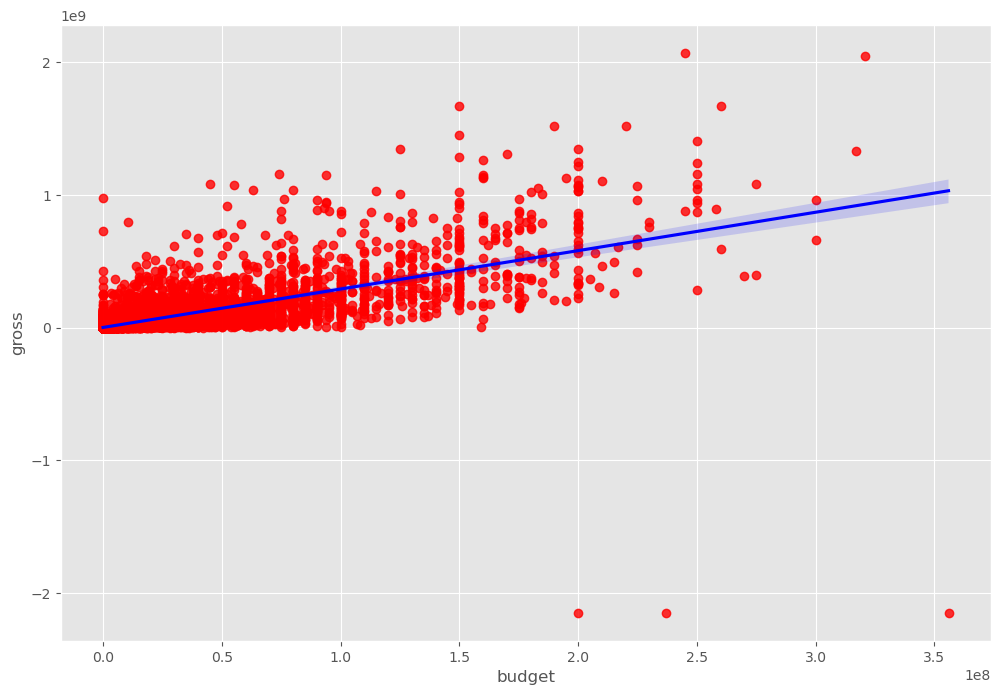

In [48]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget' , y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [ ]:
# Looking for correlation

In [13]:
df.corr(numeric_only= True, method='pearson') #Pearson, Kendall, Spearman 

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


In [ ]:
# High correlation between budget and gross

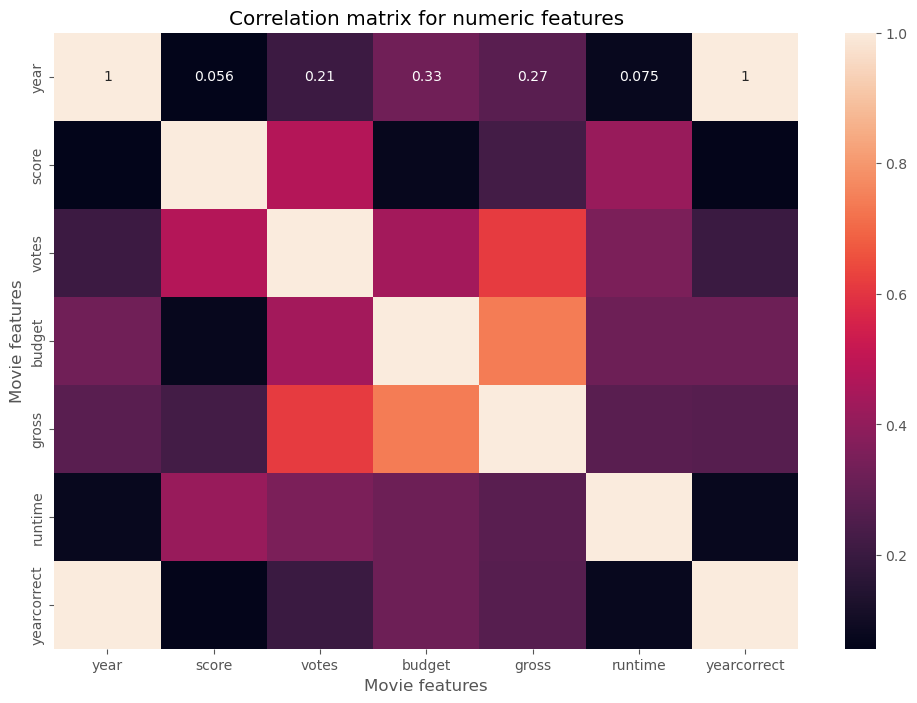

In [17]:
correlation_matrix = df.corr(numeric_only= True, method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix for numeric features')

plt.xlabel('Movie features')

plt.ylabel('Movie features')

plt.show()


In [18]:
#Looks at company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018


In [22]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,False,False,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000.0,2.847246e+09,1382,162.0,2009
7445,False,False,0,2019,137,8.4,903000.0,105,513,1470,47,356000000.0,2.797501e+09,983,181.0,2019
3045,False,False,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000.0,2.201647e+09,1382,194.0,1997
6663,False,False,0,2015,529,7.8,876000.0,768,1806,356,47,245000000.0,2.069522e+09,945,138.0,2015
7244,False,False,0,2018,145,8.4,897000.0,105,513,1470,47,321000000.0,2.048360e+09,983,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,False,False,6,2009,890,5.8,3500.0,585,2924,1498,47,3000000.0,5.073000e+03,1385,96.0,2015
2434,False,False,0,1993,1467,4.5,1900.0,1805,3102,186,47,5000000.0,2.970000e+03,1376,97.0,1994
3681,False,False,6,2000,1721,6.8,43000.0,952,1683,527,6,5000000.0,2.554000e+03,466,108.0,2001
272,False,False,9,1982,1525,3.9,2300.0,261,55,1473,47,800000.0,2.270000e+03,582,85.0,1982


In [38]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,False,False,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,False,False,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018
7480,False,False,2,2019,1126,6.9,222000.0,1012,1361,457,47,260000000,1670727580,1423,118.0,2019
6653,False,False,0,2015,1303,7.0,593000.0,335,2523,293,47,150000000,1670516444,1397,124.0,2015
6043,False,False,0,2012,1899,8.0,1300000.0,1060,1646,1470,47,220000000,1518815515,983,143.0,2012


E:\anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


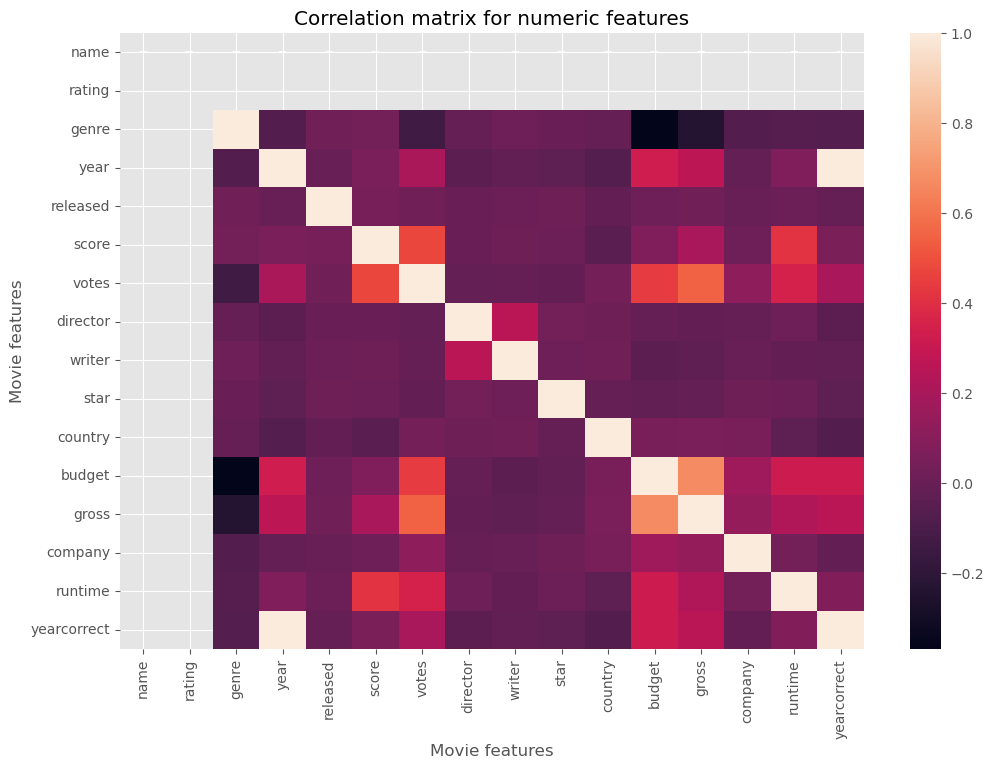

In [30]:
correlation_matrix = df_numerized.corr(numeric_only= True, method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix for numeric features')

plt.xlabel('Movie features')

plt.ylabel('Movie features')

plt.show()

In [31]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,NaN,NaN,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.238629,-0.071334,-0.059237,-0.069147
year,NaN,NaN,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.267631,-0.014333,0.075077,0.998726
released,NaN,NaN,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.025636,-0.002407,0.008975,-0.005989
score,NaN,NaN,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.201086,0.020656,0.414068,0.061923
votes,NaN,NaN,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.550649,0.118470,0.352303,0.203098
director,NaN,NaN,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.017821,-0.008223,0.017433,-0.037371
writer,NaN,NaN,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.026665,-0.003697,-0.017561,-0.025495
star,NaN,NaN,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.011854,0.014082,0.010108,-0.032687


In [32]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name                NaN
             rating              NaN
             genre               NaN
             year                NaN
             released            NaN
                              ...   
yearcorrect  budget         0.320312
             gross          0.262186
             company       -0.018806
             runtime        0.075294
             yearcorrect    1.000000
Length: 256, dtype: float64

In [33]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget   -0.368523
budget       genre    -0.368523
genre        gross    -0.238629
gross        genre    -0.238629
votes        genre    -0.135990
                         ...   
company      rating         NaN
runtime      name           NaN
             rating         NaN
yearcorrect  name           NaN
             rating         NaN
Length: 256, dtype: float64

In [34]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross        votes          0.550649
votes        gross          0.550649
budget       gross          0.669203
gross        budget         0.669203
yearcorrect  year           0.998726
year         yearcorrect    0.998726
genre        genre          1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and Budget have the highest correlation to gross earnings
